# Install Requirements

In [41]:
%pip install openpyxl
%pip install xgboost
%pip install plotnine

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gohxu\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gohxu\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip' command.


  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gohxu\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip' command.


# Importing Python modules

In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # python visualization library
import xgboost as xgb
import random
import datetime as dt
import gc
from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from plotnine import ggplot, aes, geom_point, scale_color_gradient, stat_smooth

color = sns.color_palette()
np.random.seed(1)

# Read CSV files
- `train_2016_df`
    - pd.read_csv("train_2016.csv", parse_dates=["transactiondate"])
- `properties_2016_df`
    - pd.read_csv("properties_2016.csv")
- `test`
    - pd.read_csv('sample_submission.csv') # parcelid renamed to ParcelId
- `zillow_data_dictionary_df`
    - pd.ExcelFile('zillow_data_dictionary.xlsx')
- `zillow_data_dictionary`
    - sheetname: { Id: value }

### Train_2016

In [2]:
train_2016_df = pd.read_csv("train_2016.csv", parse_dates=["transactiondate"])
print(f'train_2016.shape: {train_2016_df.shape}')
train_2016_df.head()

train_2016.shape: (90275, 3)


,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [3]:
train_2016_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   parcelid         90275 non-null  int64         
 1   logerror         90275 non-null  float64       
 2   transactiondate  90275 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1 MB


### Properties_2016

In [4]:
properties_2016_df = pd.read_csv("properties_2016.csv")
# properties_2016_df.fillna(0, inplace=True)
print(f'properties_2016.shape: {properties_2016_df.shape}')
properties_2016_df.head()

C:\Users\gohxu\AppData\Local\Temp\ipykernel_5684\3906135441.py:1: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  properties_2016_df = pd.read_csv("properties_2016.csv")


properties_2016.shape: (2985217, 58)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [5]:
properties_2016_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   airconditioningtypeid         float64
 2   architecturalstyletypeid      float64
 3   basementsqft                  float64
 4   bathroomcnt                   float64
 5   bedroomcnt                    float64
 6   buildingclasstypeid           float64
 7   buildingqualitytypeid         float64
 8   calculatedbathnbr             float64
 9   decktypeid                    float64
 10  finishedfloor1squarefeet      float64
 11  calculatedfinishedsquarefeet  float64
 12  finishedsquarefeet12          float64
 13  finishedsquarefeet13          float64
 14  finishedsquarefeet15          float64
 15  finishedsquarefeet50          float64
 16  finishedsquarefeet6           float64
 17  fips                          float64
 18  fireplacecnt          

In [ ]:
properties_2016_df.isnull().sum()

### Sample_submission

In [6]:
test = pd.read_csv('sample_submission.csv')
# To make it easier for merging datasets on same column_id later
test= test.rename(columns={'ParcelId': 'parcelid'})
print(f'test.shape: {test.shape}')
test.head()

test.shape: (2985217, 7)


,parcelid,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0


### Zillow_data_dictionary

In [ ]:
# read the excel file
zillow_data_dictionary_df = pd.ExcelFile('zillow_data_dictionary.xlsx')

# Track sheet names
sheet_names = zillow_data_dictionary_df.sheet_names

# Create an empty dictionary to store all contents
zillow_data_dictionary = {}

# Loop through the sheets and read them into dataframes
for sheet_name in sheet_names:
    if sheet_name == 'Data Dictionary':  # Skip this sheet
        continue
    sheet_data = {}
    for index, row in zillow_data_dictionary_df.parse(sheet_name).iterrows():
        sheet_data[row.iloc[0]] = row.iloc[1]
    [sheet_name] = sheet_data

for key, value in zillow_data_dictionary.items():
    print(key, value)

# Type Converting

### Properties_2016

In [7]:
for c, dtype in zip(properties_2016_df.columns, properties_2016_df.dtypes):
    if dtype == np.float64:
        properties_2016_df[c] = properties_2016_df[c].astype(np.float32)  # np.float64 -> np.float32
    if dtype == np.int64:
        properties_2016_df[c] = properties_2016_df[c].astype(np.int32)  # np.int64 -> np.int32

### Sample_submission

In [8]:
for column in test.columns:
    if test[column].dtype == int:
        test[column] = test[column].astype(np.int32)  # int -> np.int32
    if test[column].dtype == float:
        test[column] = test[column].astype(np.float32)  # float -> np.float32

# Feature Engineering

- New Features in properties_2016_df
    - __living_area_prop__ (living area proportions)
        - 'calculatedfinishedsquarefeet' / 'lotsizesquarefeet'
    - __value_ratio__ (tax value ratio)
        - 'taxvaluedollarcnt' / 'taxamount'
    - __value_prop__ (tax value proportions)
        - 'structuretaxvaluedollarcnt' / 'landtaxvaluedollarcnt'

- `df_train_2016`
    - train_2016_df.merge(properties_2016_df, how='left', on='parcelid')
- `df_test_2016`
    - test.merge(properties_2016_df, how='left', on='parcelid')


### New Features

In [9]:

# living area proportions
properties_2016_df['living_area_prop'] = properties_2016_df['calculatedfinishedsquarefeet'] / properties_2016_df['lotsizesquarefeet']
# tax value ratio
properties_2016_df['value_ratio'] = properties_2016_df['taxvaluedollarcnt'] / properties_2016_df['taxamount']
# tax value proportions
properties_2016_df['value_prop'] = properties_2016_df['structuretaxvaluedollarcnt'] / properties_2016_df['landtaxvaluedollarcnt']

### Merging Datasets for 2016

In [74]:
df_train_2016 = train_2016_df.merge(properties_2016_df, how='left', on='parcelid')
df_test_2016 = test.merge(properties_2016_df, how='left', on='parcelid')

# Remove previos variables to save some memory
# del properties_2016_df, train_2016_df
# gc.collect()

In [75]:
df_train_2016.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,living_area_prop,value_ratio,value_prop
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,360170.0,2015.0,237416.0,6735.879883,NaN,NaN,6.037107e+13,0.223698,53.470371,0.517042
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,585529.0,2015.0,239071.0,10153.019531,NaN,NaN,NaN,0.621191,57.670429,1.449185
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,119906.0,2015.0,57912.0,11484.480469,NaN,NaN,6.037464e+13,0.194082,10.440699,1.070486
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,244880.0,2015.0,73362.0,3048.739990,NaN,NaN,6.037296e+13,0.011840,80.321709,2.337968
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,434551.0,2015.0,264977.0,5488.959961,NaN,NaN,6.059042e+13,0.380500,79.168182,0.639957


In [76]:
df_test_2016.head()

,parcelid,201610,201611,201612,201710,201711,201712,airconditioningtypeid,architecturalstyletypeid,basementsqft,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,living_area_prop,value_ratio,value_prop
0,10754147,0,0,0,0,0,0,NaN,NaN,NaN,...,9.0,2015.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10759547,0,0,0,0,0,0,NaN,NaN,NaN,...,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10843547,0,0,0,0,0,0,NaN,NaN,NaN,...,1413387.0,2015.0,762631.0,20800.369141,NaN,NaN,NaN,1.157581,67.950089,0.853304
3,10859147,0,0,0,0,0,0,NaN,NaN,NaN,...,1156834.0,2015.0,585488.0,14557.570312,NaN,NaN,NaN,0.673847,79.466148,0.975846
4,10879947,0,0,0,0,0,0,NaN,NaN,NaN,...,433491.0,2015.0,239695.0,5725.169922,NaN,NaN,NaN,0.208647,75.716705,0.808511


### Scaling (? not running for now)

In [13]:
# some scaling
df_train_2016[['latitude', 'longitude']] /= 1e6
df_test_2016[['latitude', 'longitude']] /= 1e6
df_train_2016['censustractandblock'] /= 1e12
df_test_2016['censustractandblock'] /= 1e12

### Label Encoding (? not running for now)

In [14]:
# Label Encoding
lbl = LabelEncoder()

# encoding df_train
for c in df_train_2016.columns:
    df_train_2016[c]=df_train_2016[c].fillna(0)
    if df_train_2016[c].dtype == 'object':
        lbl.fit(list(df_train_2016[c].values))
        df_train_2016[c] = lbl.transform(list(df_train_2016[c].values))
        
# encoding df_test        
for c in df_test_2016.columns:
    df_test_2016[c]=df_test_2016[c].fillna(0)
    if df_test_2016[c].dtype == 'object':
        lbl.fit(list(df_test_2016[c].values))
        df_test_2016[c] = lbl.transform(list(df_test_2016[c].values))

# Exploratory Data Analysis

- Top 10 Feature Importance
    1. latitude
    2. calculatedfinishedsquarefeet
    3. lotsizesquarefeet
    4. bathroomcnt
    5. longitude
    6. value_ratio
    7. yearbuilt
    8. taxamount
    9. living_area_prop
    10. structuretaxvaluedollarcnt


### Latitude and Longitude

<Figure size 1200x1200 with 0 Axes>

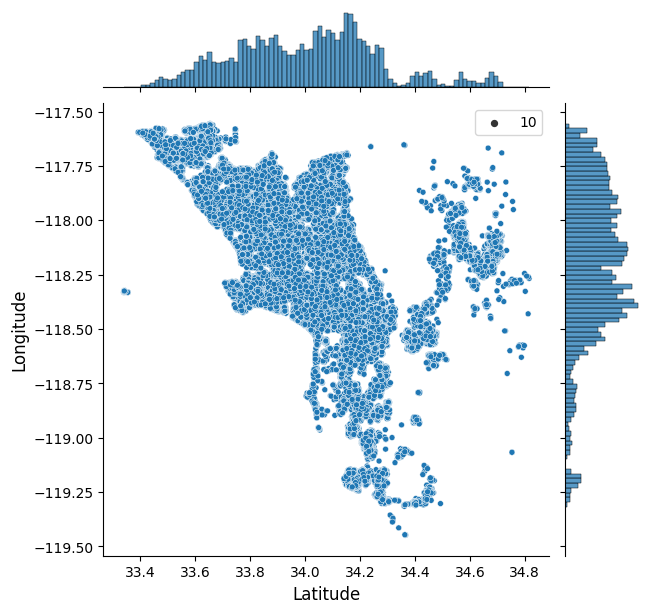

In [15]:
plt.figure(figsize=(12,12))
sns.jointplot(x=df_train_2016.latitude.values, y=df_train_2016.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

### Missing datas (NaN values)

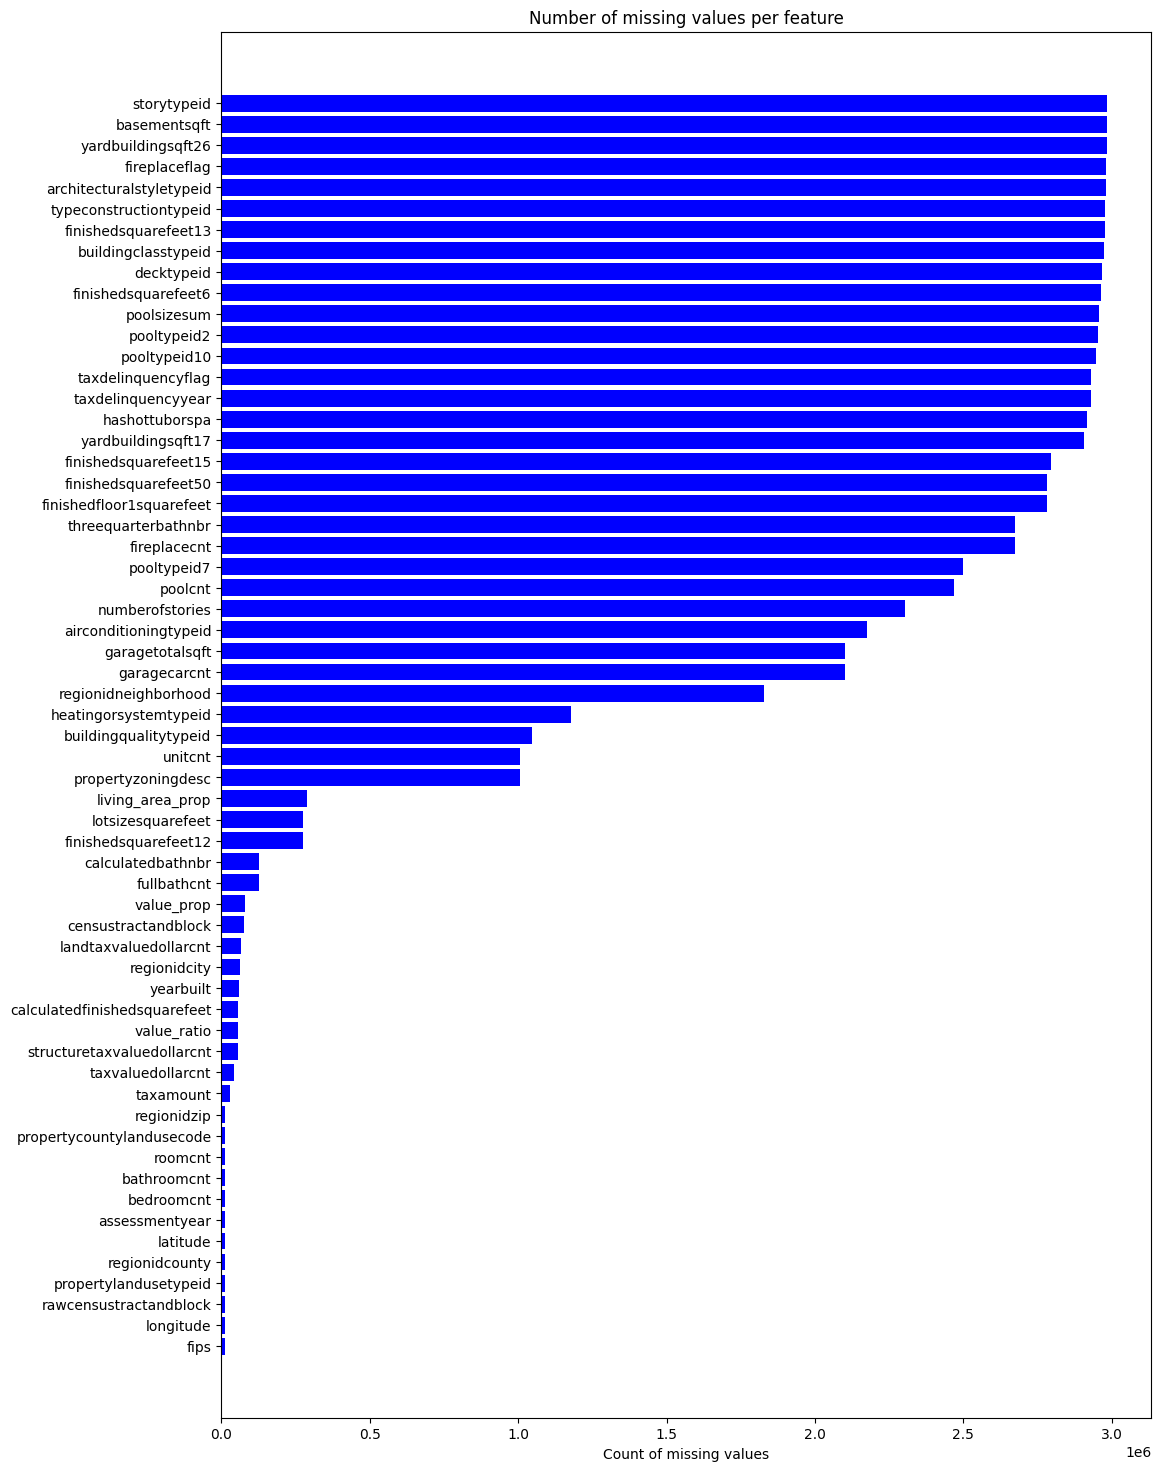

In [24]:
missing_df = properties_2016_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count'] > 0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values per feature")
plt.show()

In [19]:
missing_df = properties_2016_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / properties_2016_df.shape[0]
missing_df.loc[missing_df['missing_ratio'] > 0.999]

,column_name,missing_count,missing_ratio
3,basementsqft,2983589,0.999455
41,storytypeid,2983593,0.999456
46,yardbuildingsqft26,2982570,0.999113


### Correlation Analysis

C:\Users\gohxu\AppData\Local\Temp\ipykernel_5684\826383813.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_values = df_train_2016.mean(axis=0)
c:\Users\gohxu\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\gohxu\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


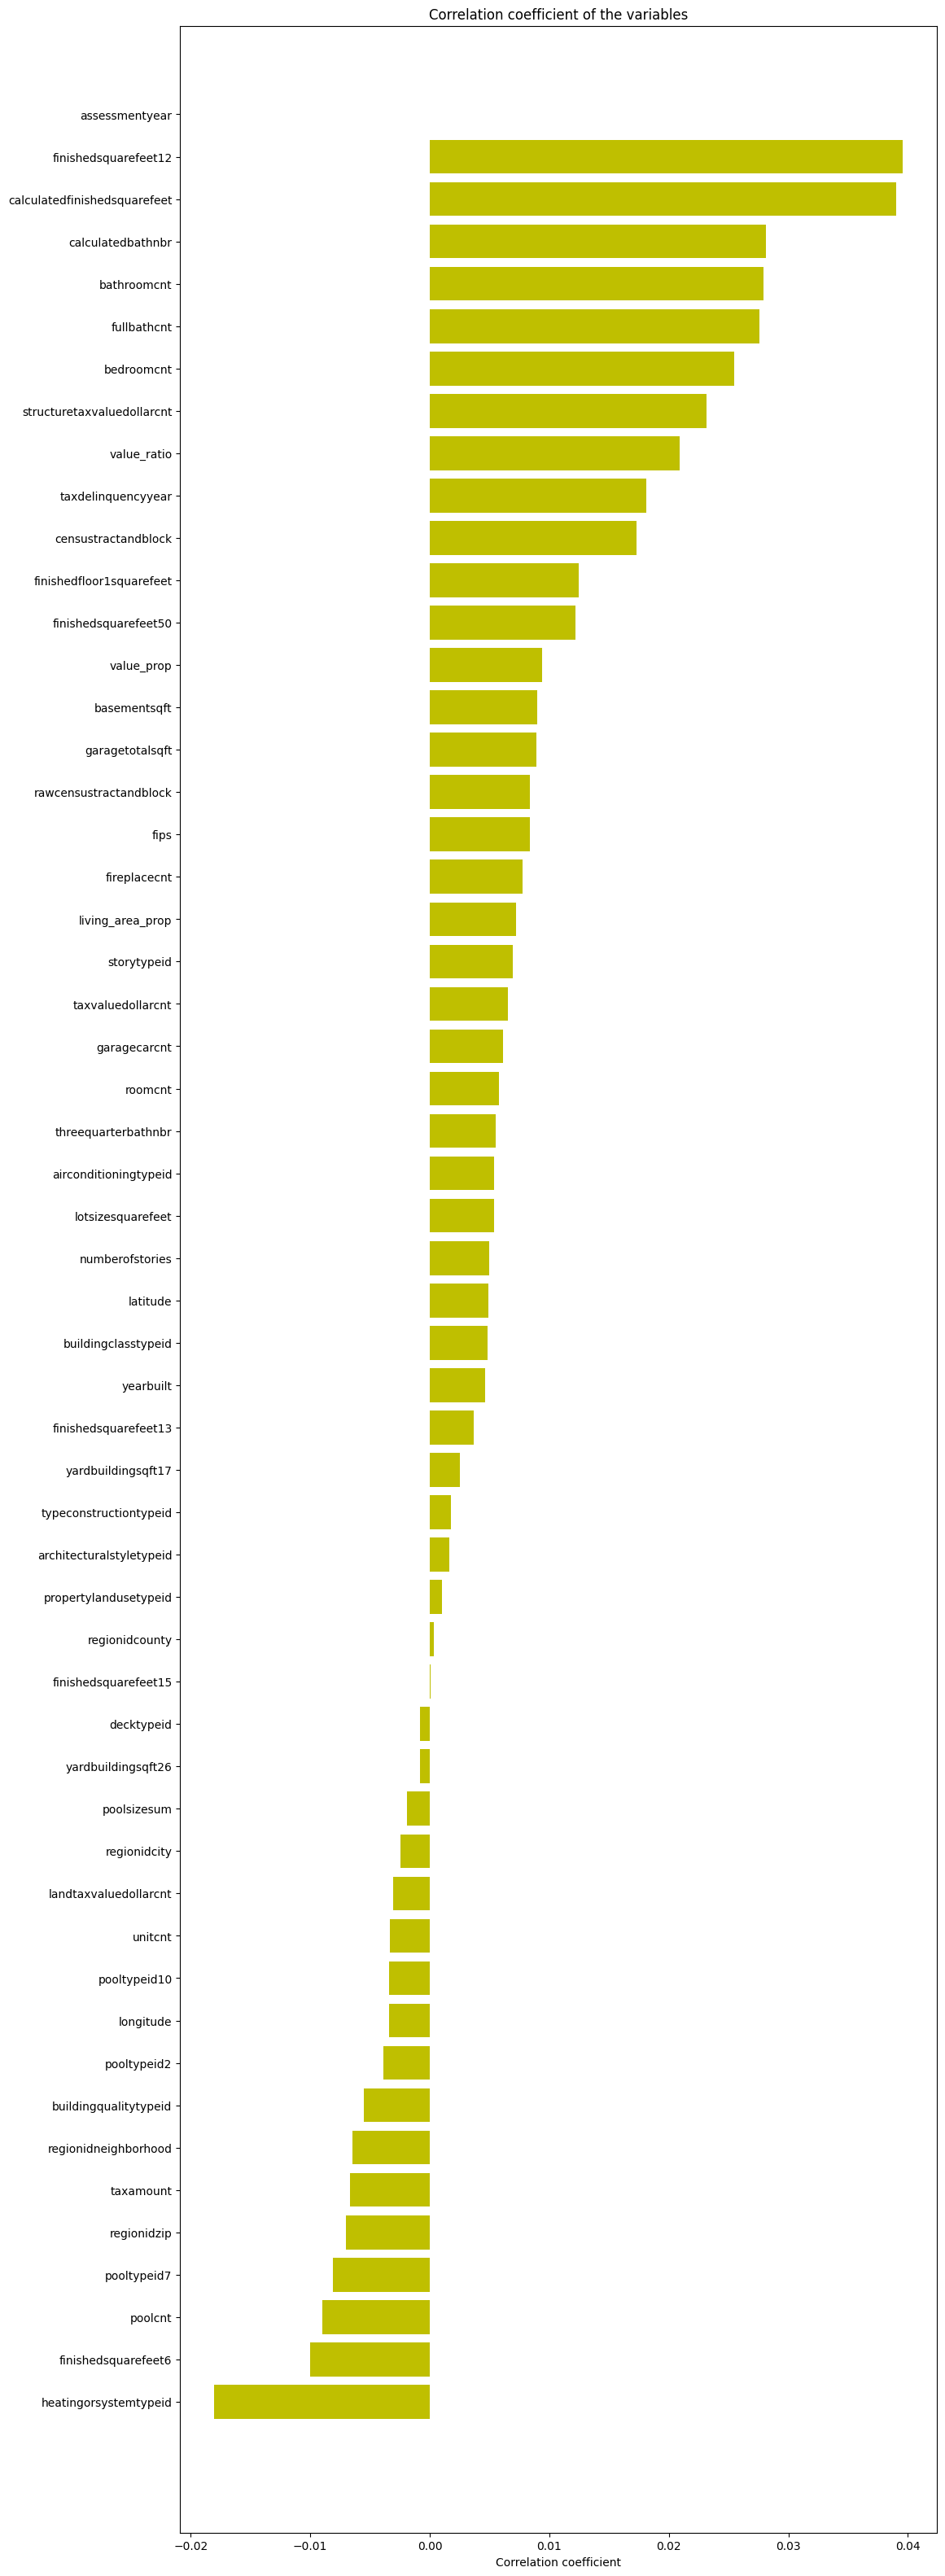

In [22]:
mean_values = df_train_2016.mean(axis=0)
train_df_new = df_train_2016.fillna(mean_values, inplace=False)
x_cols = [col for col in train_df_new.columns if col not in ['logerror'] if train_df_new[col].dtype=='float32']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df_new[col].values, train_df_new.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

In [26]:
corr_df_sel = corr_df.loc[(corr_df['corr_values'] > 0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

,col_labels,corr_values
21,heatingorsystemtypeid,-0.018009
53,value_ratio,0.020934
45,structuretaxvaluedollarcnt,0.023141
4,bedroomcnt,0.025467
18,fullbathcnt,0.027571
3,bathroomcnt,0.027889
7,calculatedbathnbr,0.028114
10,calculatedfinishedsquarefeet,0.039011
11,finishedsquarefeet12,0.039557


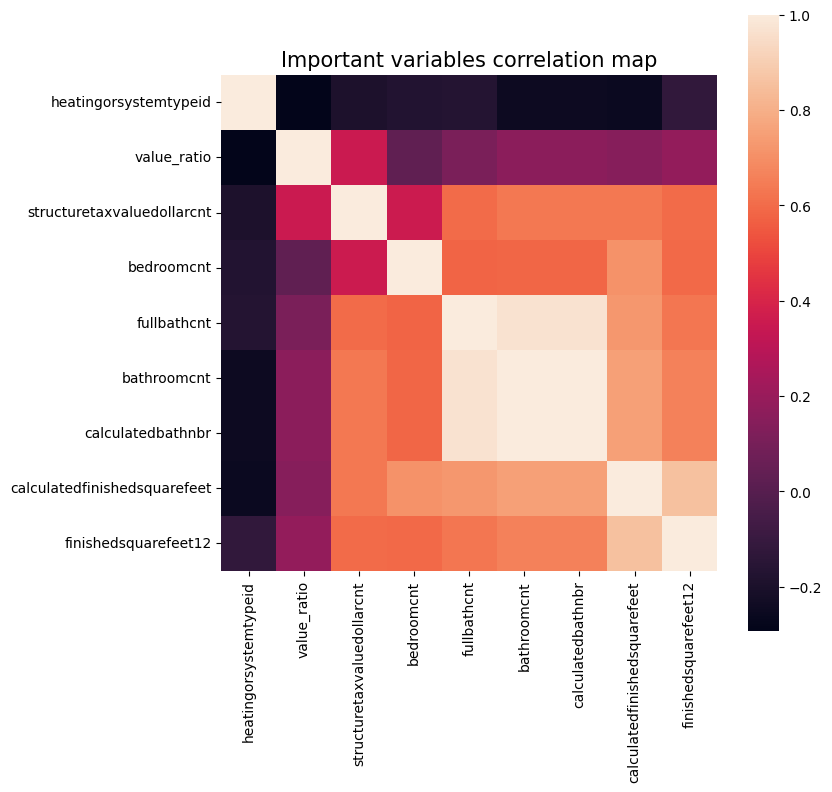

In [27]:
cols_to_use = corr_df_sel.col_labels.tolist()

temp_df = df_train_2016[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

<Figure size 1200x1200 with 0 Axes>

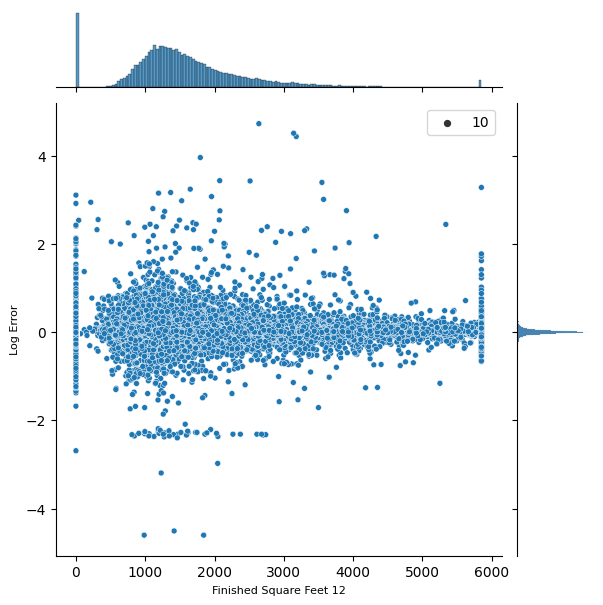

In [33]:
# Finished Square Feet 12 correlation with Log Error
col = "finishedsquarefeet12"
ulimit = np.percentile(df_train_2016[col].values, 99.5)
llimit = np.percentile(df_train_2016[col].values, 0.5)
df_train_2016[col].loc[df_train_2016[col] > ulimit] = ulimit
df_train_2016[col].loc[df_train_2016[col] < llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=df_train_2016.finishedsquarefeet12.values, y=df_train_2016.logerror.values, size=10)
plt.ylabel('Log Error', fontsize=8)
plt.xlabel('Finished Square Feet 12', fontsize=8)
plt.show()

# Range of logerror decreases as the number of finished square feet increases

<Figure size 1200x1200 with 0 Axes>

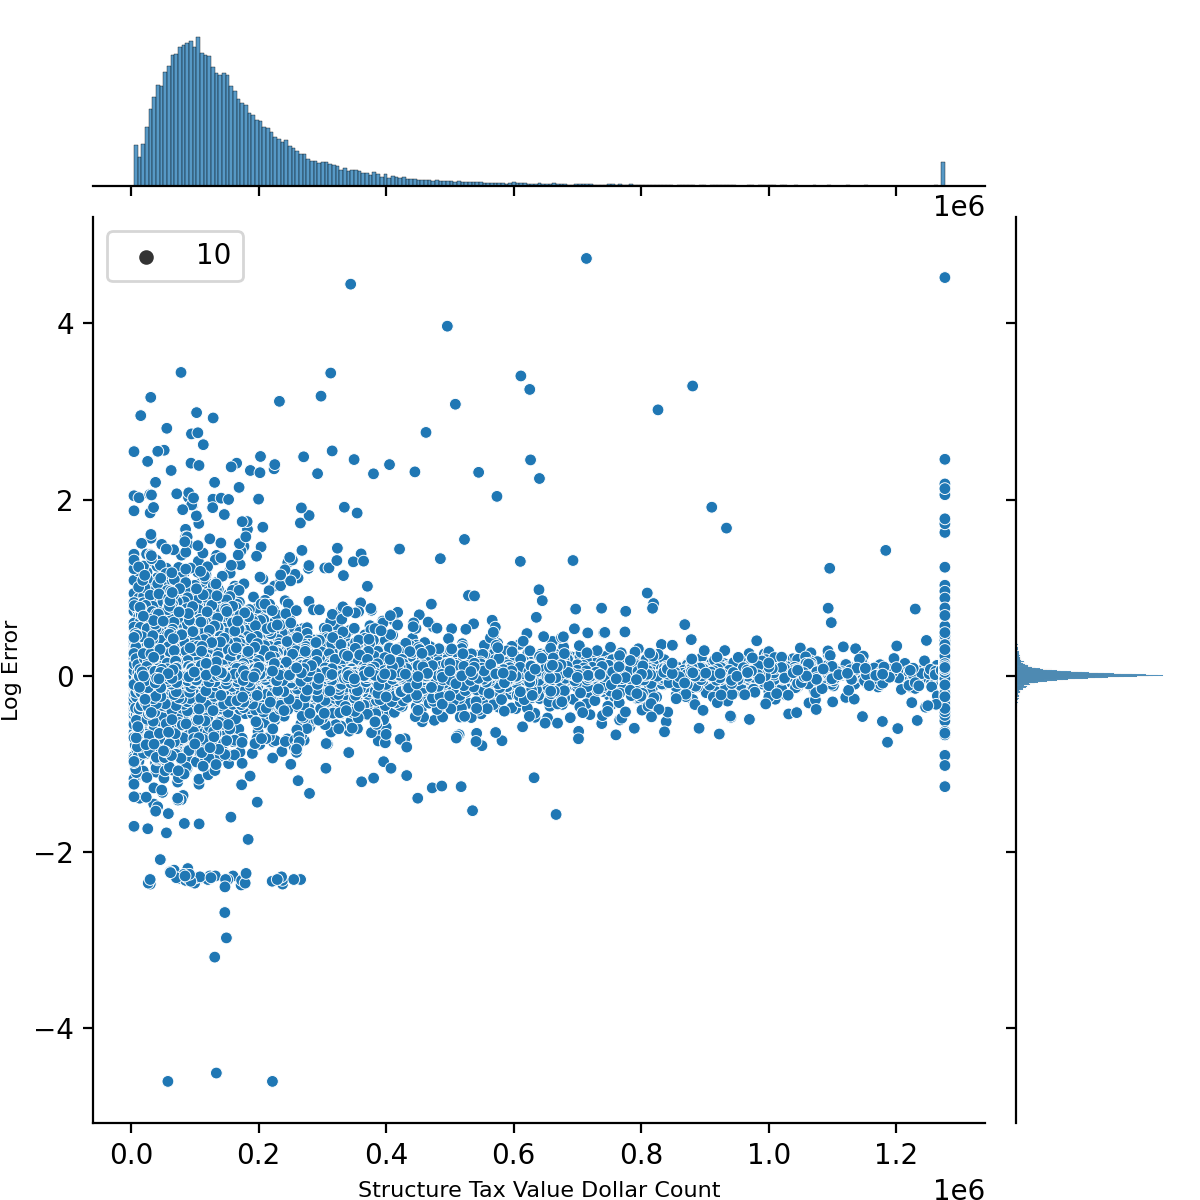

In [49]:
# Structure Tax Value Dollar Count correlation with Log Error
col = "structuretaxvaluedollarcnt"
ulimit = np.percentile(df_train_2016[col].values, 99.5)
llimit = np.percentile(df_train_2016[col].values, 0.5)
df_train_2016[col].loc[df_train_2016[col] > ulimit] = ulimit
df_train_2016[col].loc[df_train_2016[col] < llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=df_train_2016.structuretaxvaluedollarcnt.values, y=df_train_2016.logerror.values, size=10)
plt.ylabel('Log Error', fontsize=8)
plt.xlabel('Structure Tax Value Dollar Count', fontsize=8)
plt.show()

# Range of logerror decreases as the tax amount increases

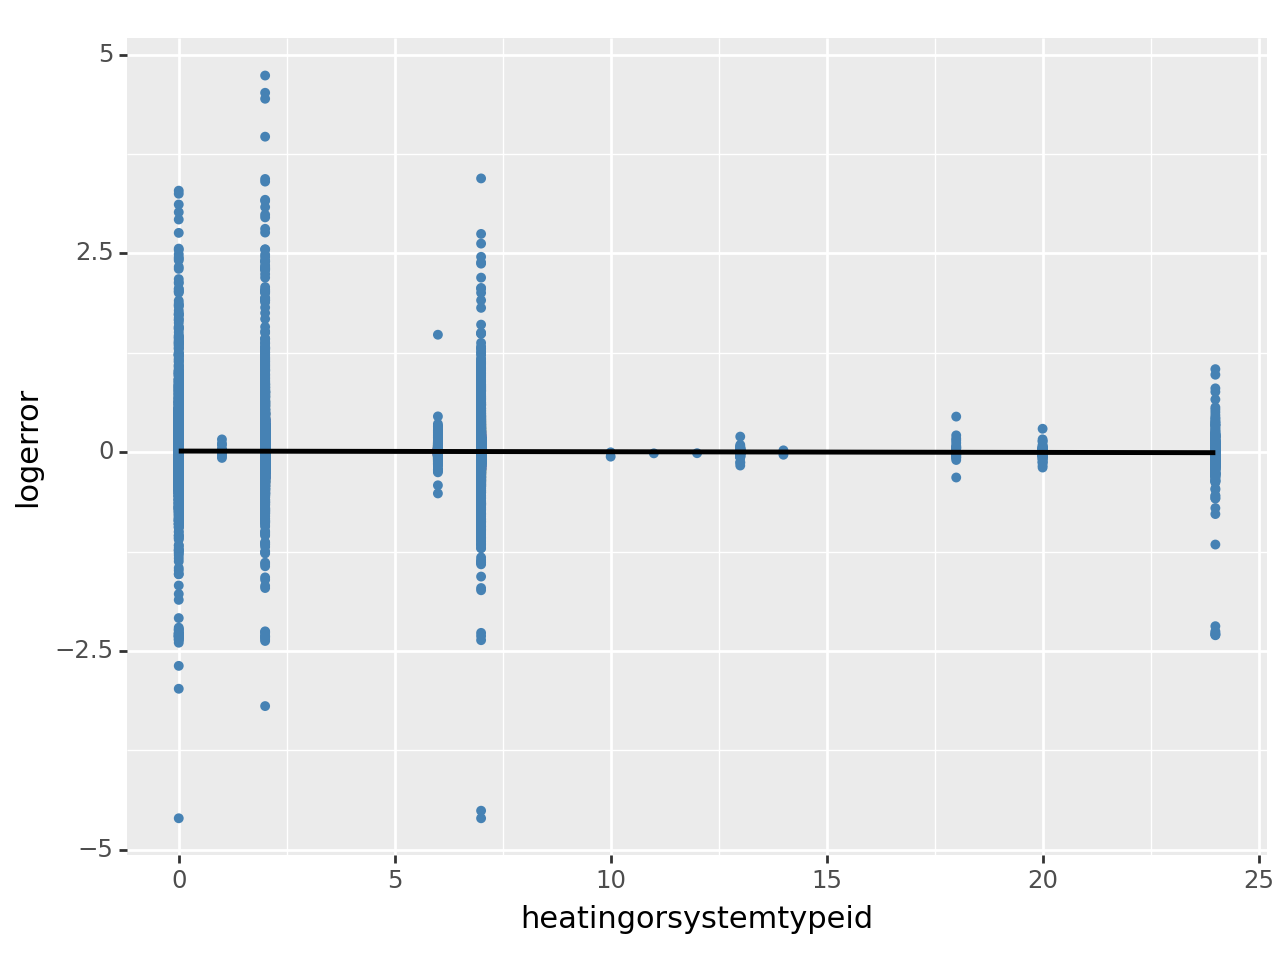

<Figure Size: (640 x 480)>

In [47]:
# Heating Or System Type ID correlation with Log Error
ggplot(df_train_2016, aes(x='heatingorsystemtypeid', y='logerror')) + geom_point(color='steelblue', size=1) + stat_smooth()

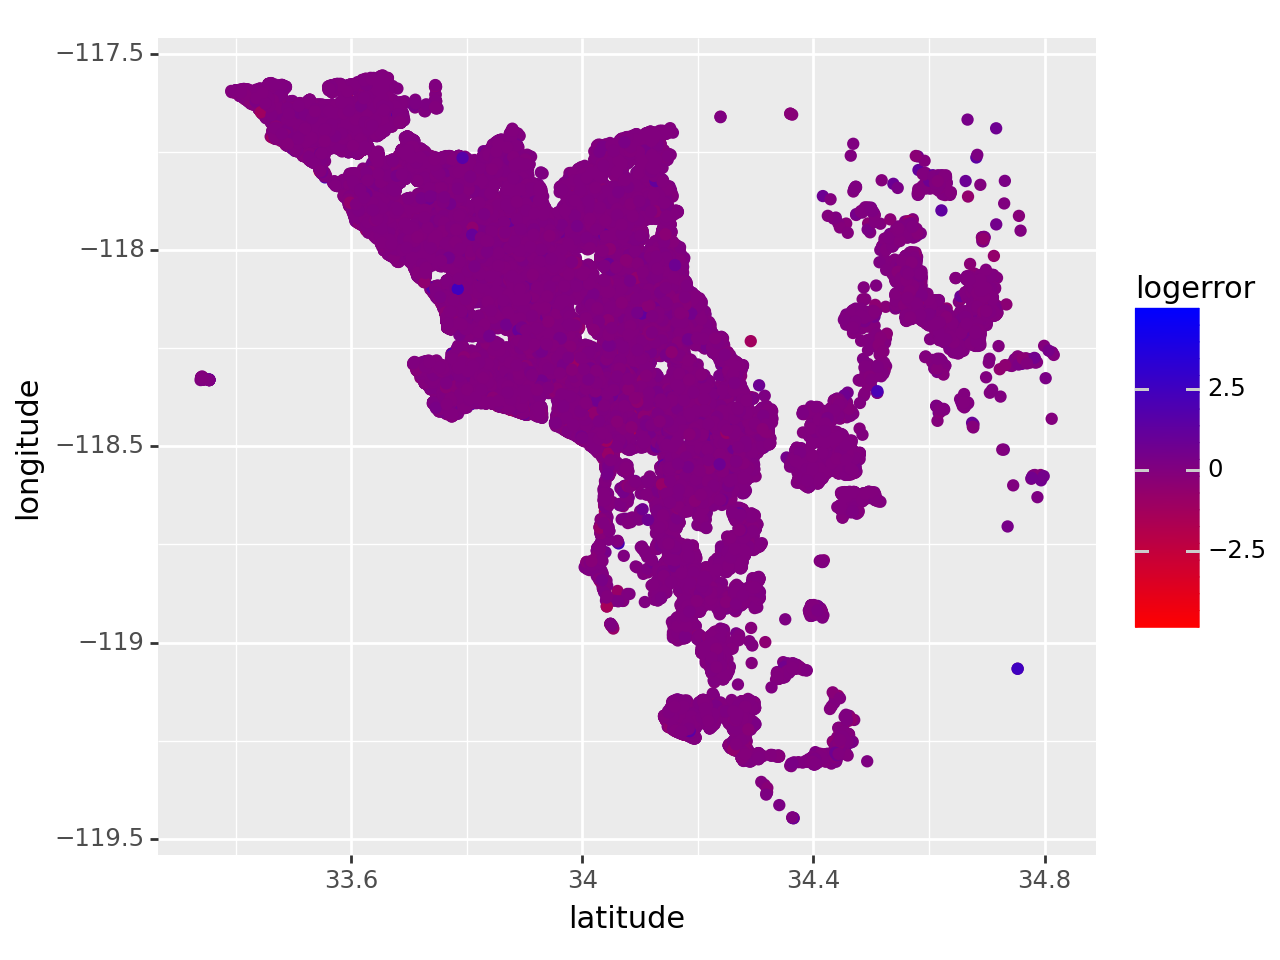

<Figure Size: (640 x 480)>

In [43]:
# Latitude and Longitude correlation with Log Error
ggplot(df_train_2016, aes(x='latitude', y='longitude', color='logerror')) + geom_point() + scale_color_gradient(low='red', high='blue')

### Important Variables Extraction

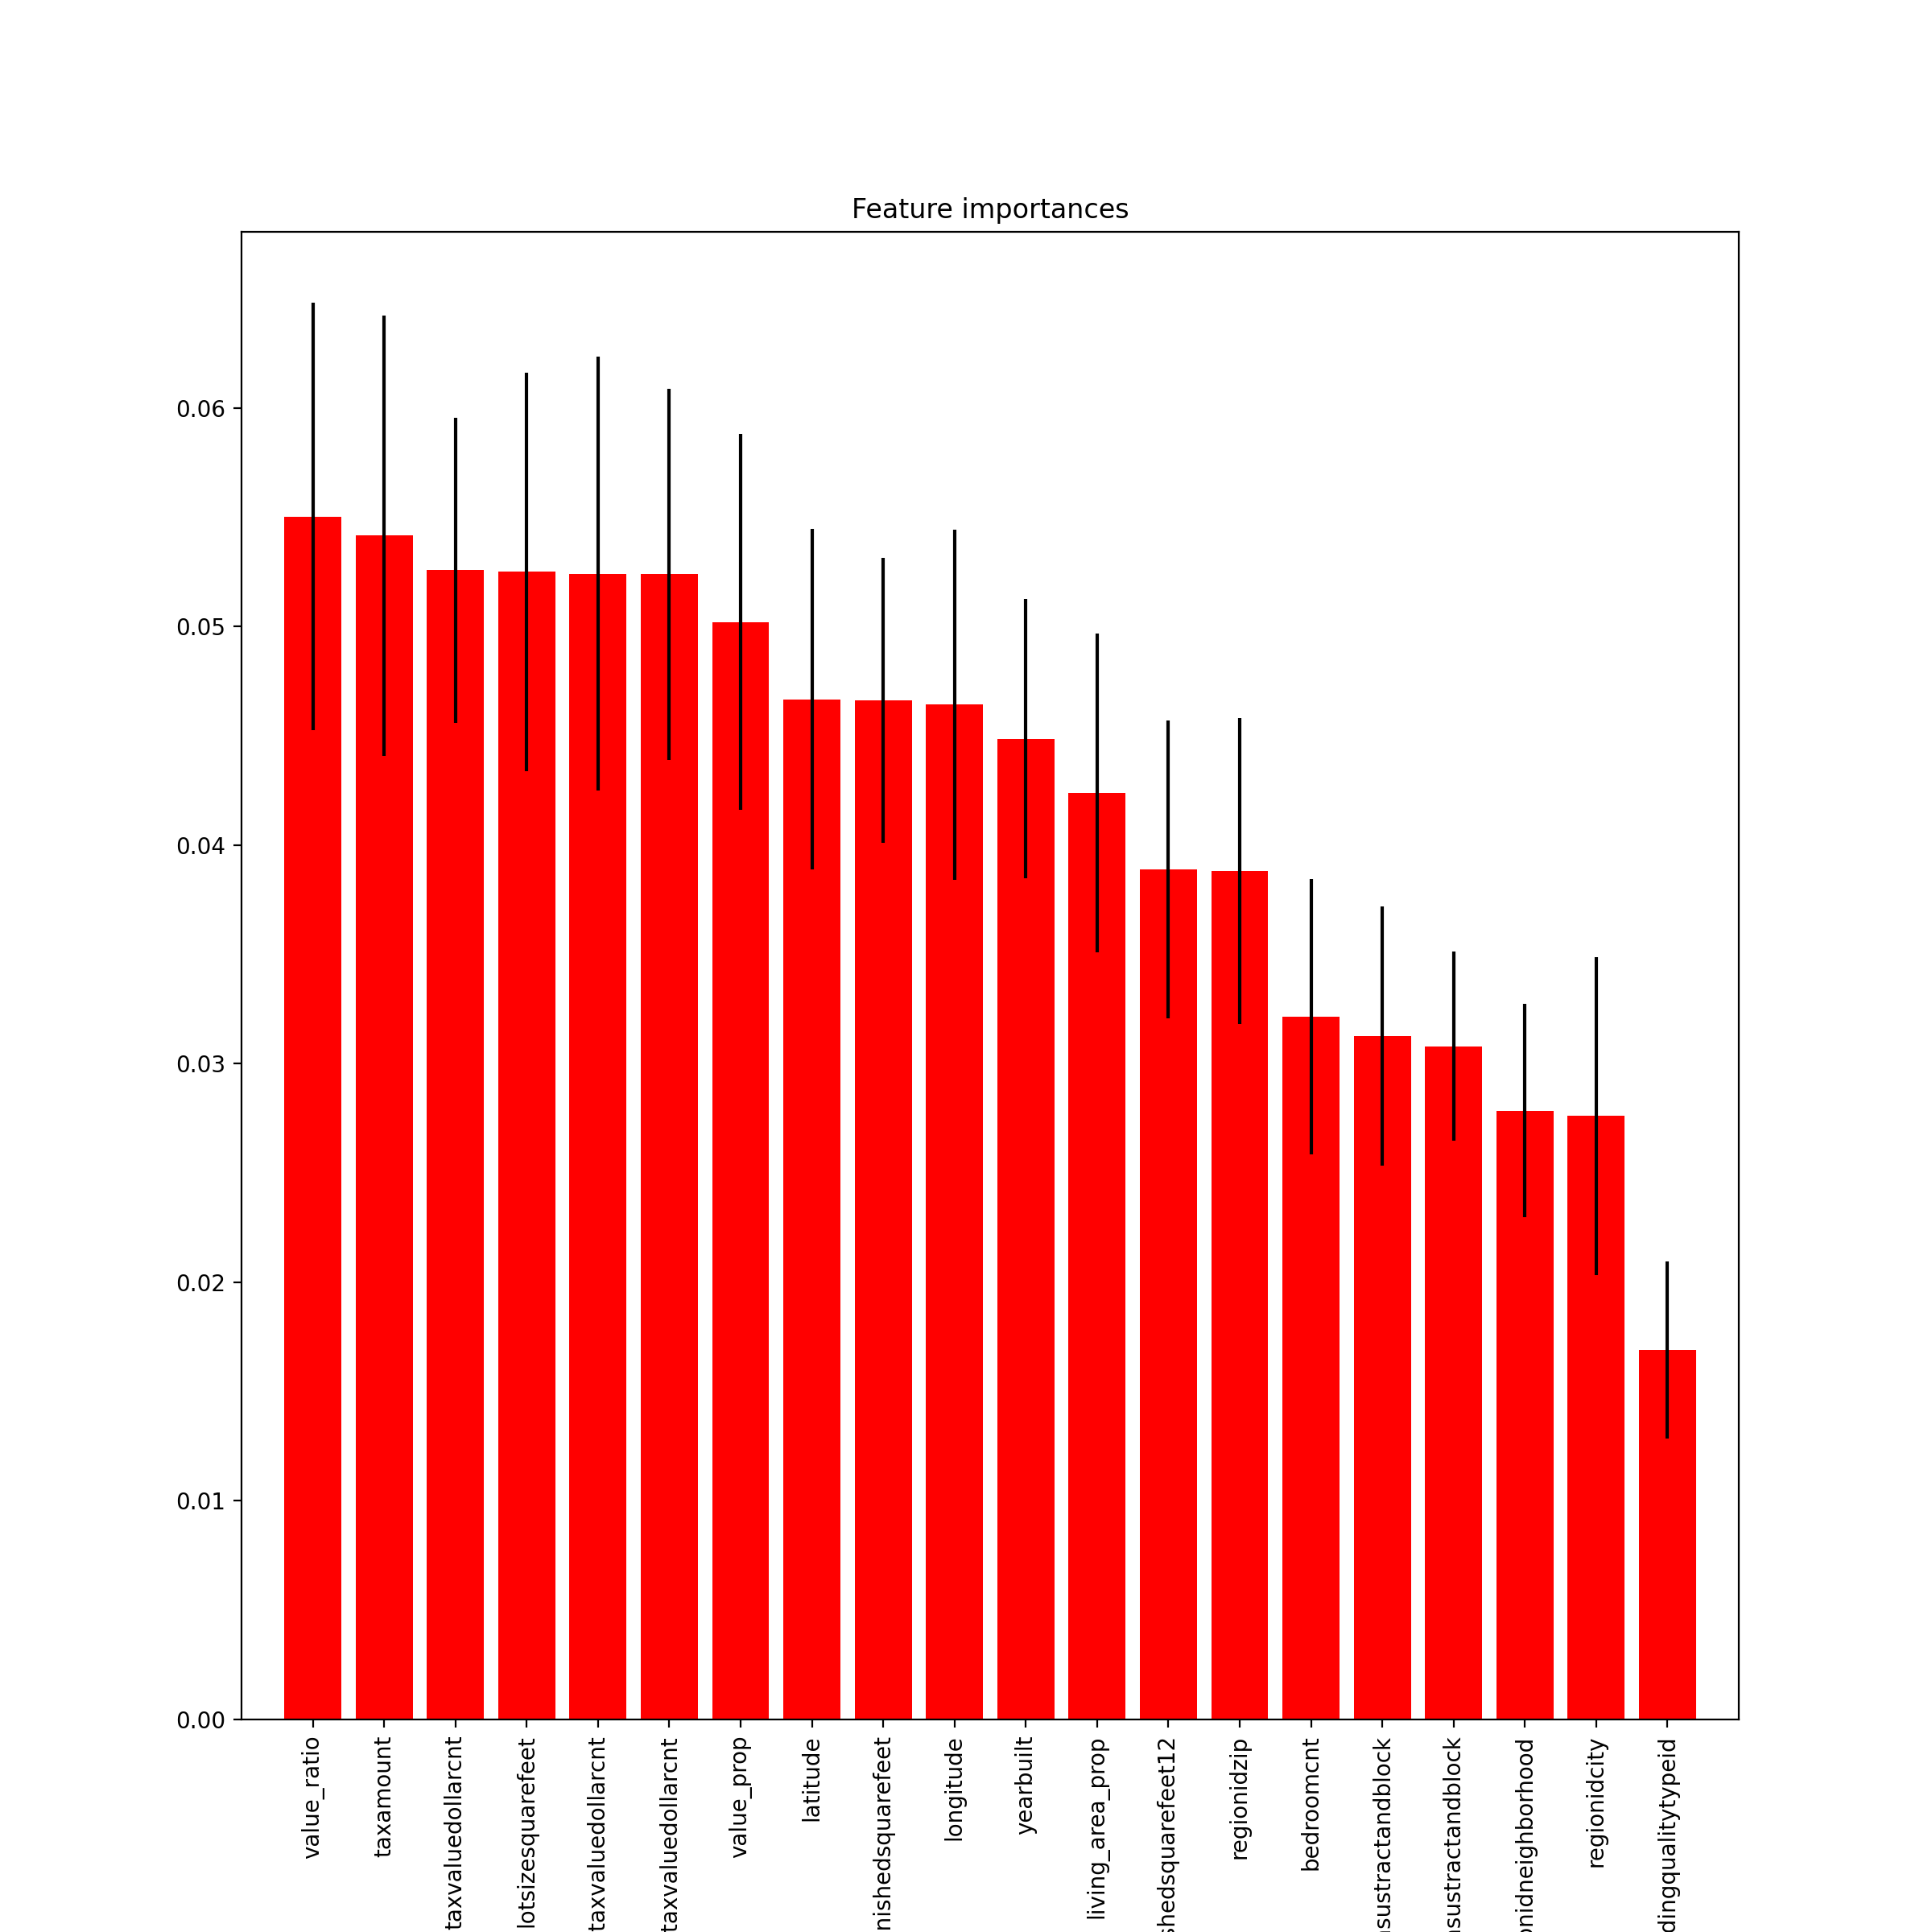

In [52]:
df_log_error = df_train_2016['logerror'].values
cat_cols = ["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"]
df_train_2016 = df_train_2016.drop(['parcelid', 'logerror', 'transactiondate']+cat_cols, axis=1)
feat_names = df_train_2016.columns.values

model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(df_train_2016, df_log_error)

## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

c:\Users\gohxu\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [01:15:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
c:\Users\gohxu\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [01:15:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.



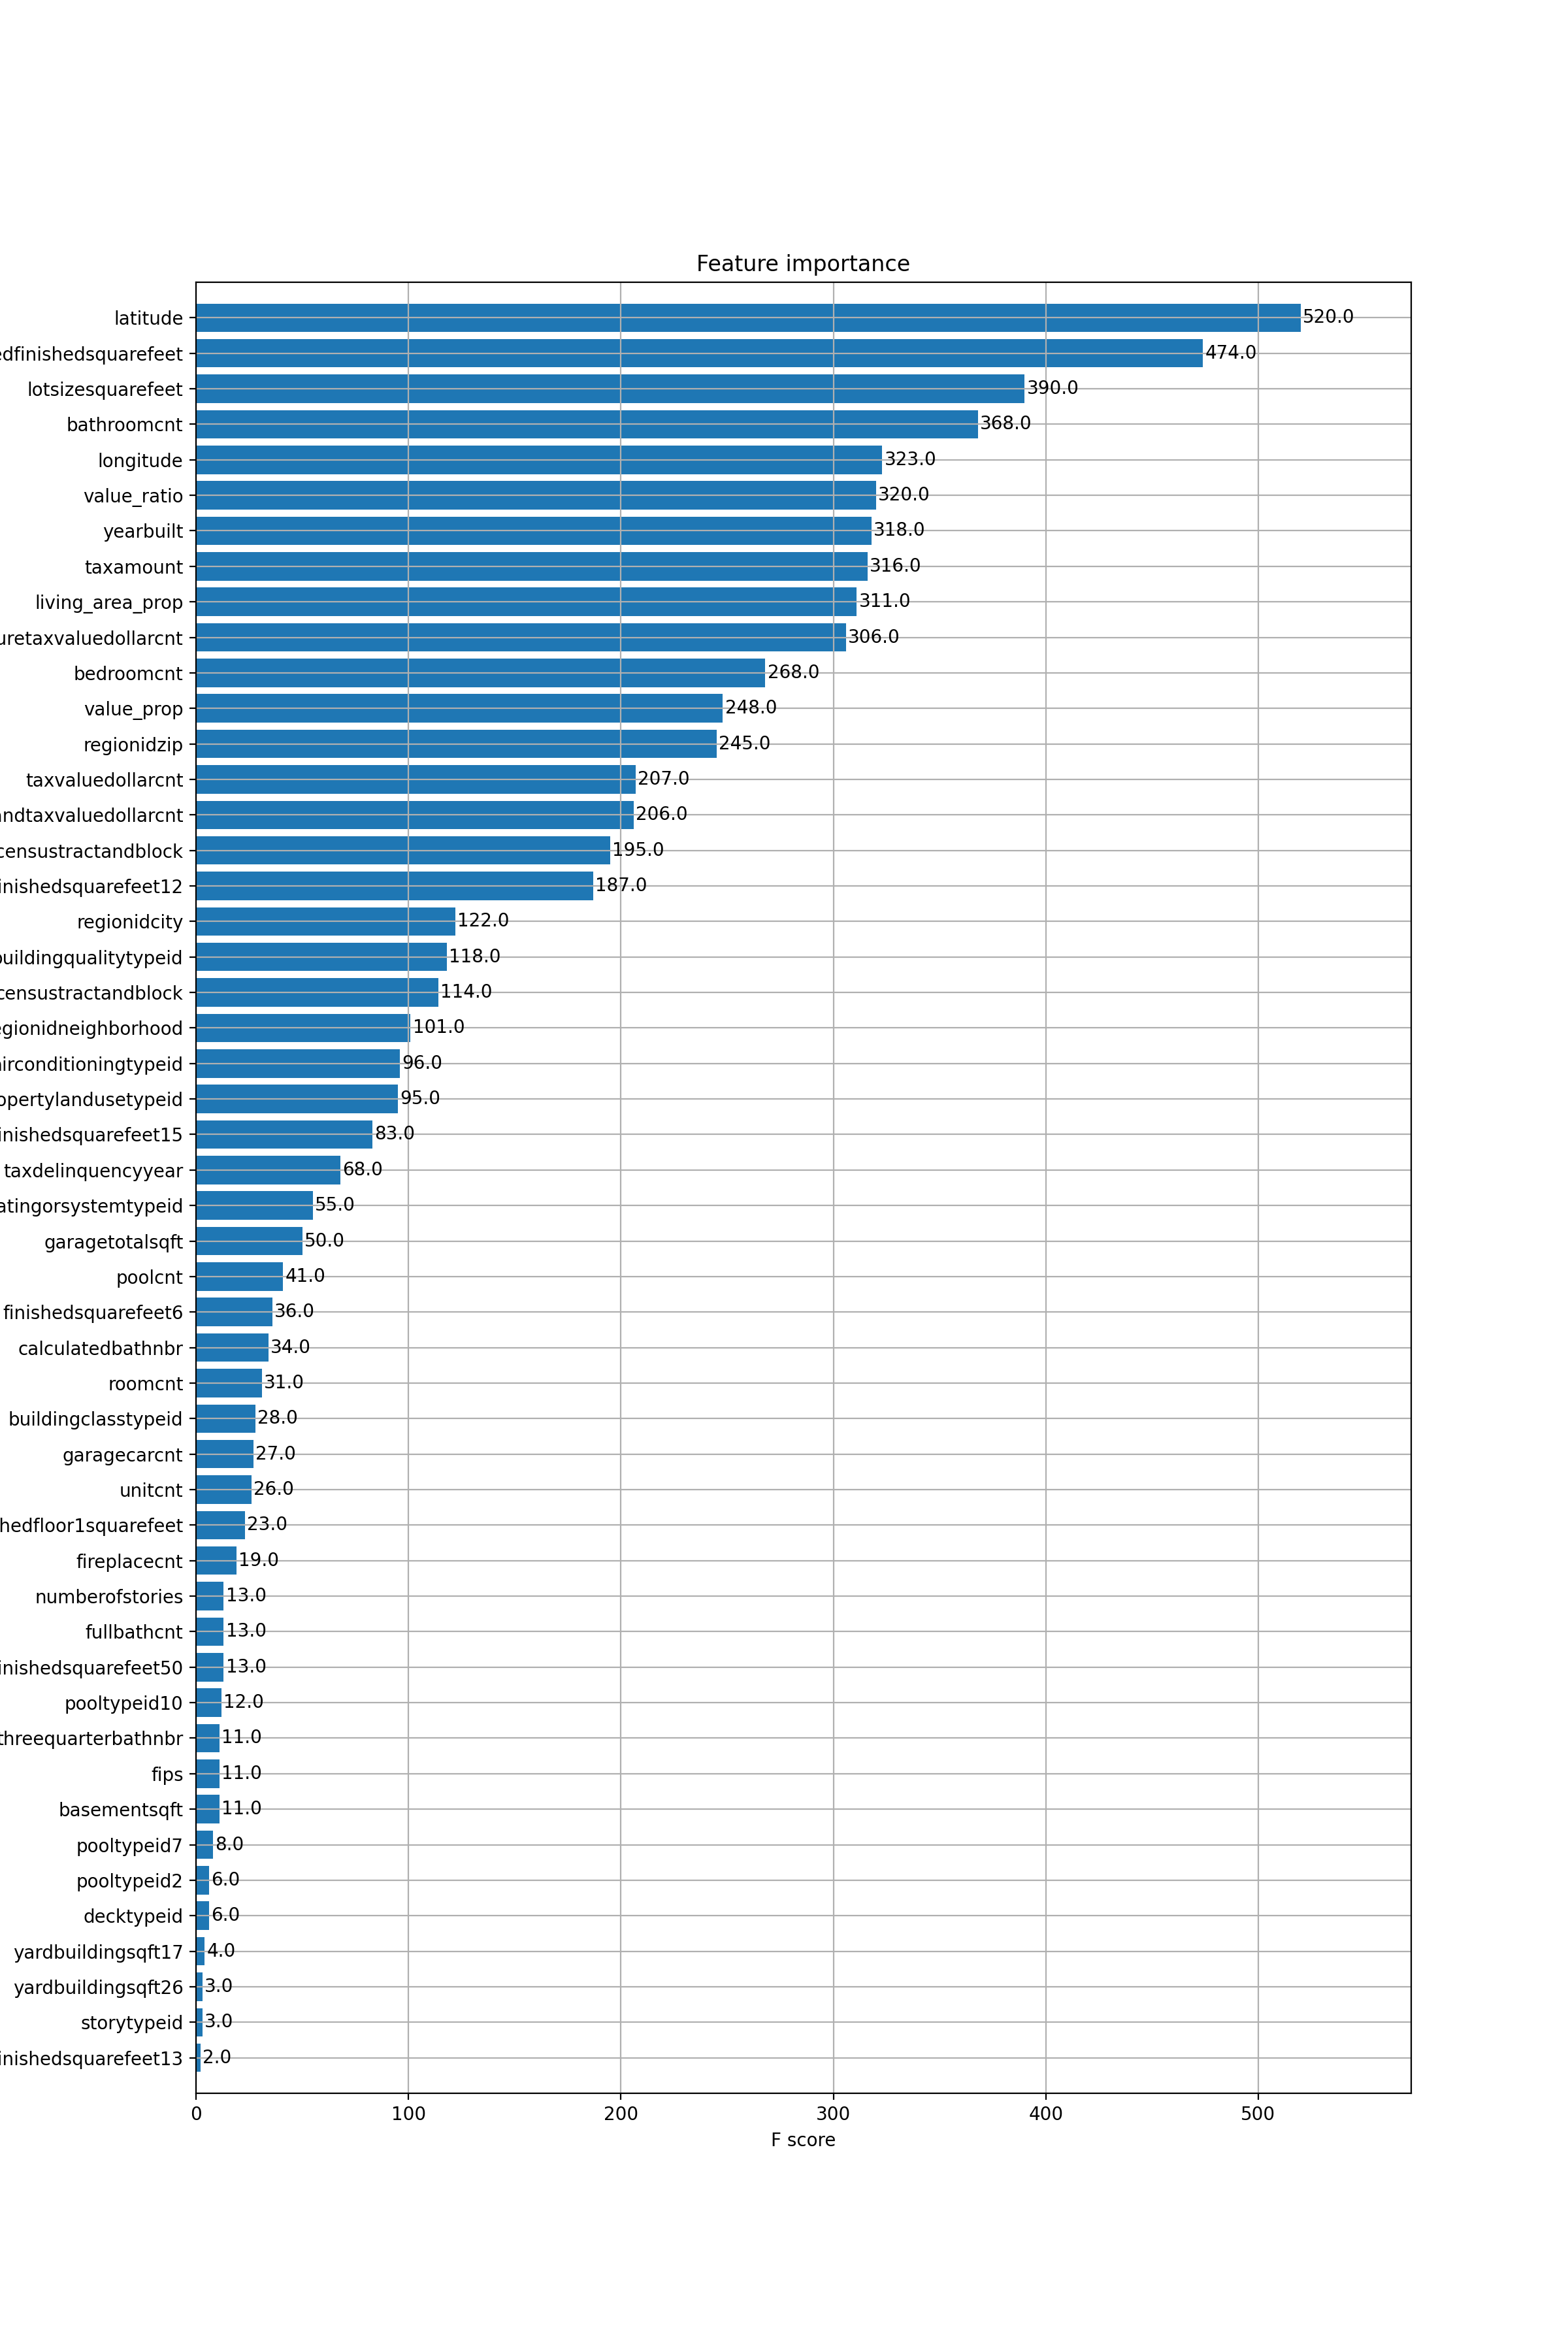

In [54]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'seed' : 0
}
dtrain = xgb.DMatrix(df_train_2016, df_log_error, feature_names=list(df_train_2016.columns.values))
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

# Break

# Prediction

### Training and test data

In [83]:
x_train = df_train_2016
for column in ['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 'propertycountylandusecode']:
    if column in x_train.columns:
        x_train = x_train.drop(column, axis=1)
x_test = df_test_2016
for column in ['parcelid', 'propertyzoningdesc', 'propertycountylandusecode', '201610', '201611', '201612', '201710', '201711', '201712']:
    if column in x_test.columns:
        x_test = x_test.drop(column, axis=1)

print('Shape train: {}\nShape test: {}'.format(x_train.shape, x_test.shape))

Shape train: (90275, 58)
Shape test: (2985217, 58)


### Data Split

In [84]:
# split data for cross validation
x_train = x_train.values
y_train = df_train_2016['logerror'].values
X = x_train
y = y_train
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Xtrain.shape: {Xtrain.shape}')
print(f'Xvalid.shape: {Xvalid.shape}')
print(f'ytrain.shape: {ytrain.shape}')
print(f'yvalid.shape: {yvalid.shape}')

Xtrain.shape: (72220, 58)
Xvalid.shape: (18055, 58)
ytrain.shape: (72220,)
yvalid.shape: (18055,)


### Build Model (Xgboost)

In [86]:
# Error here

# d_train = xgb.DMatrix(Xtrain, label=ytrain)
# d_valid = xgb.DMatrix(Xvalid, label=yvalid)
# dtest = xgb.DMatrix(x_test.values)